In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Variable initialization
assignmentDir="/Users/sundar.shankar/Documents/PG-IIITB/datasets/assignment-2/"
dataFile= assignmentDir + "loan.csv"


print(dataFile)

/Users/sundar.shankar/Documents/PG-IIITB/datasets/assignment-2/loan.csv


In [84]:
loandf = pd.read_csv(dataFile,sep=",",header=0,low_memory=False)
loandf.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [85]:
loans = loandf[loandf.columns[loandf.isnull().mean() < 0.8]]
#removing trailing and leading spaces
loans.replace('^\s+', '', regex=True, inplace=True) 
loans.replace('\s+$', '', regex=True, inplace=True)

In [86]:
#Convert term to Integer
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))
loans['term'].describe()

/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [91]:
#Convert percentage columns to Integer
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float') / 100.0
print(loans['int_rate'].describe())
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float') / 100.0
print(loans['revol_util'].describe())


/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    39717.000000
mean         0.120212
std          0.037248
min          0.054200
25%          0.092500
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64
count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64


/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [87]:
#convert emp_length Number <1 as(0)
loans['emp_length'].replace([ np.nan,"< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"], [0,0,1,2,3,4,5,6,7,8,9,10],inplace = True)


In [92]:
loans[['id','emp_length','int_rate','term']].head(5)




,id,emp_length,int_rate,term
0,1077501,10,0.1065,36
1,1077430,0,0.1527,60
2,1077175,10,0.1596,36
3,1076863,10,0.1349,36
4,1075358,1,0.1269,60


In [93]:
#Date Conversion
import datetime


loans['issue_d'] = pd.to_datetime(loans['issue_d'],format='%b-%y')
loans['last_pymnt_d'] = pd.to_datetime(loans['last_pymnt_d'], format='%b-%y')
loans['last_credit_pull_d'] = pd.to_datetime(loans['last_credit_pull_d'], format='%b-%y')
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'], format='%b-%y')


loans[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].head(10)

/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,2011-12-01,2015-01-01,2016-05-01,1985-01-01
1,2011-12-01,2013-04-01,2013-09-01,1999-04-01
2,2011-12-01,2014-06-01,2016-05-01,2001-11-01
3,2011-12-01,2015-01-01,2016-04-01,1996-02-01
4,2011-12-01,2016-05-01,2016-05-01,1996-01-01
5,2011-12-01,2015-01-01,2016-01-01,2004-11-01
6,2011-12-01,2016-05-01,2016-05-01,2005-07-01
7,2011-12-01,2015-01-01,2014-12-01,2007-01-01
8,2011-12-01,2012-04-01,2012-08-01,2004-04-01
9,2011-12-01,2012-11-01,2013-03-01,2004-09-01


In [94]:
#Missing value counts in each columns

missing_count = (loans.isnull().sum() / len(loans)) * 100

# Filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

last_credit_pull_d             0.005036
title                          0.027696
tax_liens                      0.098195
revol_util                     0.125891
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
last_pymnt_d                   0.178765
pub_rec_bankruptcies           1.754916
emp_title                      6.191303
desc                          32.580507
mths_since_last_delinq        64.662487
dtype: float64


In [95]:
numeric_data = loans.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = loans.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 36 numerical and 19 categorical features in the training data


In [96]:
print("numerical: ", numeric_data.columns)

categorical_data.drop(['url', 'desc'], inplace=True, axis=1)

print("categorical: ", categorical_data.columns)

numerical:  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')
categorical:  Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],

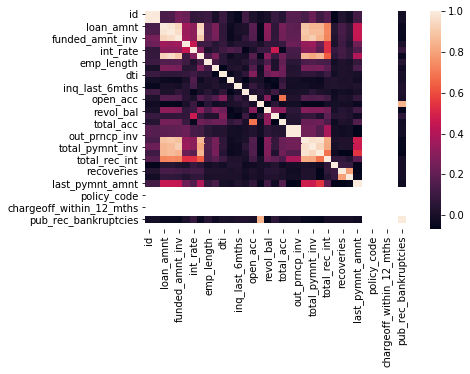

In [101]:
import seaborn as sns
# Correlation plot of the features in numeric_data

corr = numeric_data.corr()

# Plot the correlation matrix

sns.heatmap(corr,robust=True)

In [102]:
categorical_data.head(5)

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,C,C4,Ryder,RENT,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,C,C5,NaN,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,B,B5,University Medical Group,RENT,Source Verified,2011-12-01,Current,n,other,Personal,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


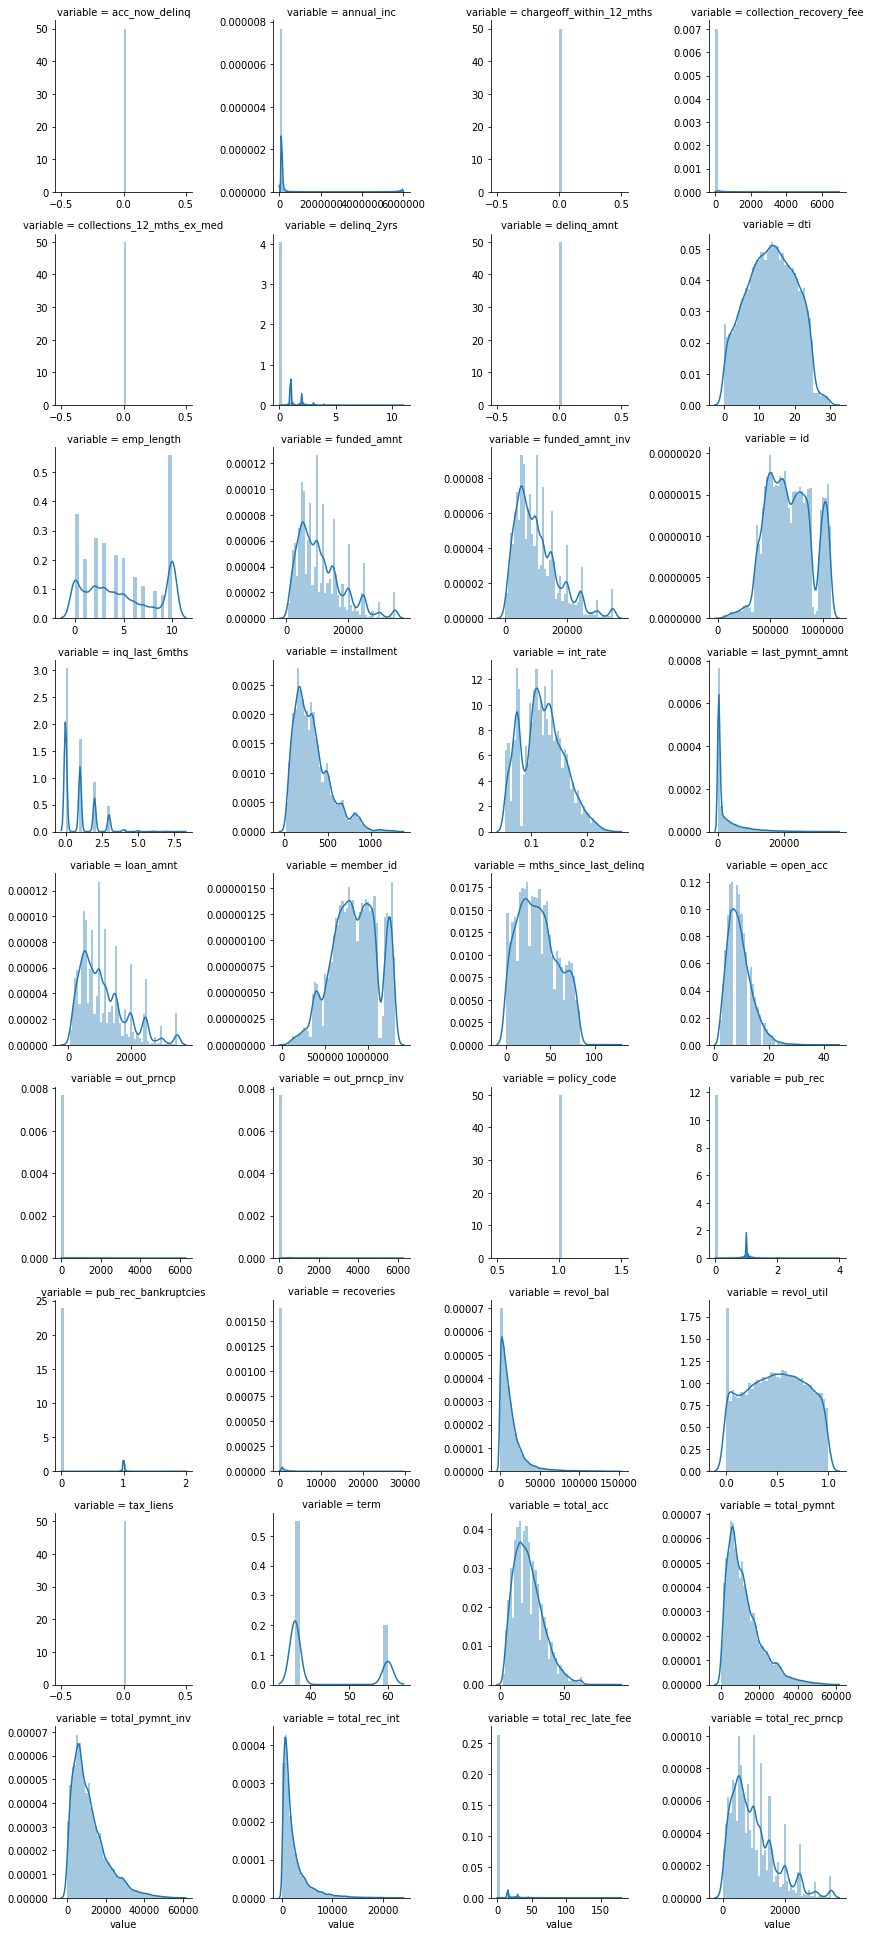

In [99]:
#Plotting Numerical data to Identify discrete values


f = pd.melt(loans, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [106]:
#Currently dropped this but need to remove not nulls
categorical_data.drop(['title', 'emp_title'], inplace=True, axis=1)
categorical_data.head(5)

,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,C,C4,RENT,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,C,C5,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,C,C1,RENT,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,B,B5,RENT,Source Verified,2011-12-01,Current,n,other,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


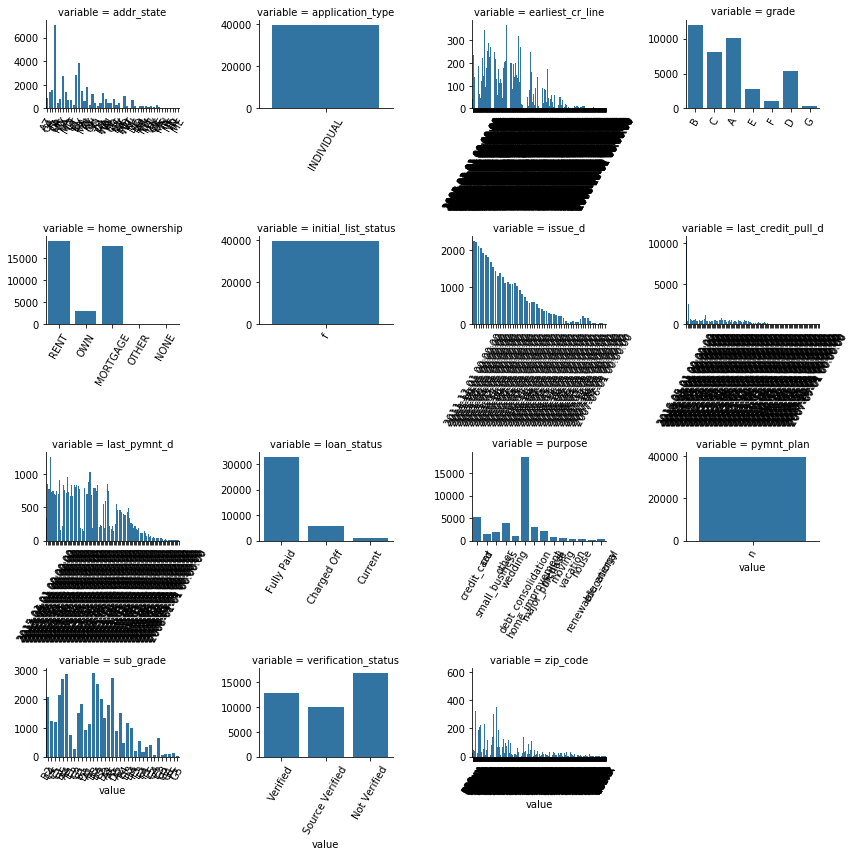

In [107]:
import matplotlib.pyplot as plt
f = pd.melt(loans, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()